***
<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility space](4_0_introduction.ipynb)
    * Previous: [4.4.1 UV Coverage: UV tracks](4_4_1_UV_Coverage_UV_Tracks.ipynb)
    * Next: [4.5 The Fourier Approximation & the Van Cittert-Zernike theorem](4_5_The_Fourier_Approximation_VanCittert-Zernike_Theorem.ipynb)

***

In [1]:
from IPython.core.display import HTML
from IPython.display import display
import matplotlib.pyplot as plt
from ipywidgets import *
from mpl_toolkits.mplot3d import Axes3D
import plotBL
import numpy as np

%matplotlib inline

styles = open("../style/course.css", "r").read()
HTML(styles)


In [2]:
from IPython.display import HTML
HTML('../style/code_toggle.html')

---
# Outline

### 4.4.2 Improving your coverage

* 4.4.2.A Configuration of an N-element interferometer
    
* 4.4.2.B Integration in time: Earth Rotation Synthesis    
    
* 4.4.2.C Integration in frequency: Frequency Synthesis
    
---

We have seen in [$\S$ 4.4.1 &#10142;](4_4_1_UV_Coverage_UV_Tracks.ipynb) that the visibility function is sampled in a particular way. Depending on the location of the interferometer (in latitude), the projected baseline w.r.t. the observed source and the time and frequency of observation, the $uv$ plane is sampled along tracks which can be derived from the expression of the projected baseline in the ($u$,$v$,$w$) reference frame. These $uv$ tracks are portions of ellipses. During the course of an observation, samples are accumulated along these tracks and form the *$uv$ coverage*.
A precise knowledge of the sky requires the best possible knowledge of the visibility function and therefore a complete sampling of the $uv$ plane. 

We will see, in this section, how the $uv$ coverage can be improved using multiple element interferometer ([$\S$ 4.4.2.A &#10549;](#sec:442A))  and using time ([$\S$ 4.4.2.B &#10549;](#sec:442B)) and frequency[$\S$ 4.4.2.C &#10549;](#sec:442C) () integration.



<a id="sec:442A"></a>
### 4.4.2.A Configuration of an N-element interferometer

Up to now, we only considered the case of a 2-element interferometer. In practice, interferometers are built from $N$  elements for which all cross-correlations are computed and amount to $\frac{N(N-1)}{2}$ independent cross-correlations (for each frequency channel, each time step and each polarization). For a N-element interferometer, the sampling in the $uv$ plane is then proportional to $N^2$.

In the following, we will show the characteristic $uv$ coverage of well-known radio interferometers, observed at a single frequency and a single time step (i.e. a *snapshot* observation). You may select the array of your choice from the list below:

In [3]:
config = widgets.Dropdown(
    options={'VLAa':'configs/vlaa.enu.txt',
        'VLAb':'configs/vlab.enu.txt',
        'VLAc':'configs/vlac.enu.txt',
        'VLAd':'configs/vlad.enu.txt',
        'WSRT':'configs/wsrt.enu.txt',
        'kat7':'configs/kat-7.enu.txt',
        'meerkat':'configs/meerkat.enu.txt'},
    value="configs/vlaa.enu.txt",
    Description="Antennas:")

display(config)

From the list define above, you can select different configurations corresponding to real instrumental layout.
However, if you want to specify yourself the relative positions of the antenna in a $ENU$ reference frame, you can edit the following block and set the variable "custom" to "1".

In [10]:
# you need to re-evaluate this box if you modify the array.
antennaPosition=np.genfromtxt(config.value)


In [11]:
# Custom antenna distribution
custom=0
if (custom):
    antennaPosition = np.zeros((10, 2), dtype=float)
    antennaPosition[0,:] = [0,0]
    antennaPosition[1,:] = [-4, 5]
    antennaPosition[2,:] = [4, 5]
    antennaPosition[3,:] = [-10,0]
    antennaPosition[4,:] = [-8,-3]
    antennaPosition[5,:] = [-4,-5]
    antennaPosition[6,:] = [0,-6]
    antennaPosition[7,:] = [4,-5]
    antennaPosition[8,:] = [8,-3]
    antennaPosition[9,:] = [10,0]

Let's plot the distribution of the antennas from the selected (or customized) interferometer:

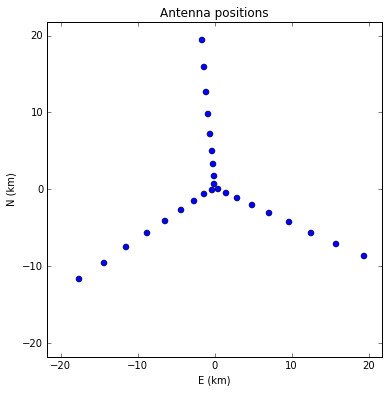

In [12]:
%matplotlib inline
mxabs = np.max(abs(antennaPosition[:]))*1.1;
# make use of pylab librery to plot
fig=plt.figure(figsize=(6,6))
plt.plot((antennaPosition[:,0]-np.mean(antennaPosition[:,0]))/1e3, (antennaPosition[:,1]-np.mean(antennaPosition[:,1]))/1e3, 'o')
plt.axes().set_aspect('equal')
plt.xlim(-mxabs/1e3, mxabs/1e3)
plt.ylim(-mxabs/1e3, (mxabs+5)/1e3)
plt.xlabel("E (km)")
plt.ylabel("N (km)")
plt.title("Antenna positions")

<a id="fig:4414"></a>
**Figure 4.4.14**: Distribution of the antennas in a $ENU$ reference frame. Each dot represents an antenna which will be part of $N$-1 baselines.

As for the previous simulations, we will simulate an observation using the VLA as the default case.

** Observation configuration **

In [13]:
# Observation parameters
c=3e8                                         # Speed of light
f=1420e6                                      # Frequency
lam = c/f                                     # Wavelength 

time_steps = 1200                              # time steps
h = np.linspace(-6,6,num=time_steps)*np.pi/12 # Hour angle window

# declination convert in radian

L = np.radians(34.0790)      # Latitude of the VLA
dec = np.radians(34.)

** The *snapshot* $\boldsymbol{uv}$ coverage **

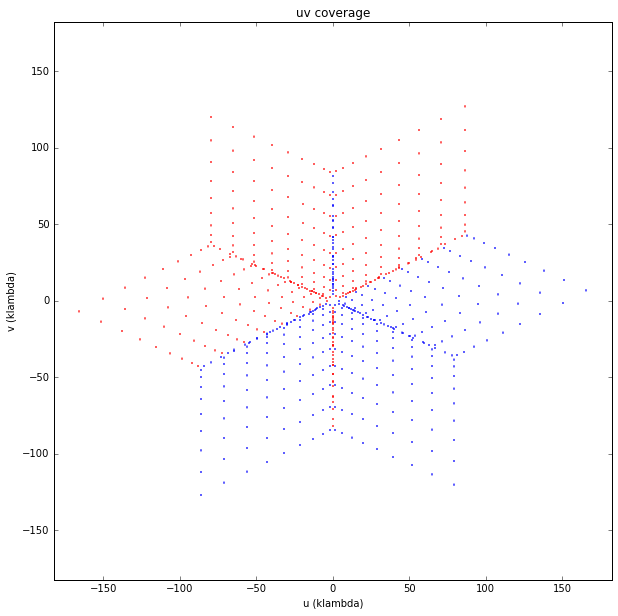

In [14]:
%matplotlib inline
Ntimes=3
plotBL.plotuv(antennaPosition,L,dec,h,Ntimes,lam)

<a id="fig:4415"></a>
**Figure 4.4.15**: Snapshot $uv$ coverage of the interferometer. Red and blue points corresponds to symmetric $uv$ points due to the fact that each baseline gives us the measurement of $V_\nu$ at ($u$,$v$) and its complex conjugate $V^*_\nu$ at ($-u$,$-v$).

Depending on the number of elements and their relative distribution on the ground, the shape of the snapshot $uv$ coverage can be very different from on interferometer to the other. One may prefer an antenna distribution which maximizes an instantaneous coverage which spans all over the $uv$ plane (e.g. VLA in Fig. [4.4.15 &#10549;](#fig:4415)) rather than a compact array which samples a smaller portion of the $uv$ plane. With the raw increase of the total sensitivity, improving the instantaneous $uv$ coverage is the main motivation which leads to increase the number of elements and to optimize their relative positions. A *good* $uv$ coverage can be obtained if the $uv$ plane is sufficiently and smoothly sampled. In the next section, we will see how the Earth contributes to enrich the $uv$ coverage with a variety of samples.

<a id="sec:442B"></a>
### 4.4.2.B Integration in time: Earth Rotation Synthesis

The observation of one source during several hours requires the tracking of this source with fringe (or delay) tracking. During the motion of the source in the sky, the projected baselines, as seen from the source, will continuously vary along the elliptical $uv$ tracks.
If the time sampling is high enough, it is possible to sample each $uv$ track along the observation and accumulate a number of $\frac{N(N-1)}{2}\times N_\text{times}$ independent measurements.

The following experiment will give you the possibility to change the number of time steps collected during an observation, from a snapshot observation up to a 12 hour observation.

In the next block, a snapshot observation will be plotted. You can increase the duration of the observation with the slider which defines the total number of time steps for which the $uv$ coverage is computed. Upon a change on the slider, a new plot will be generated next to the previous one to enable visual comparisons.

(Test values of 2, $\sim$300, $\sim$1200 to see the effects on the $uv$ coverage. Allow some time to generate the plot, especially at large values of time samples).

Ntimes=2


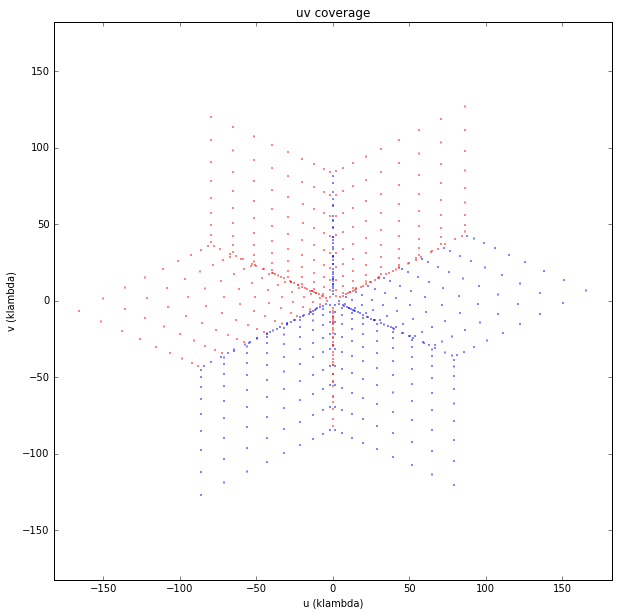

Ntimes=302


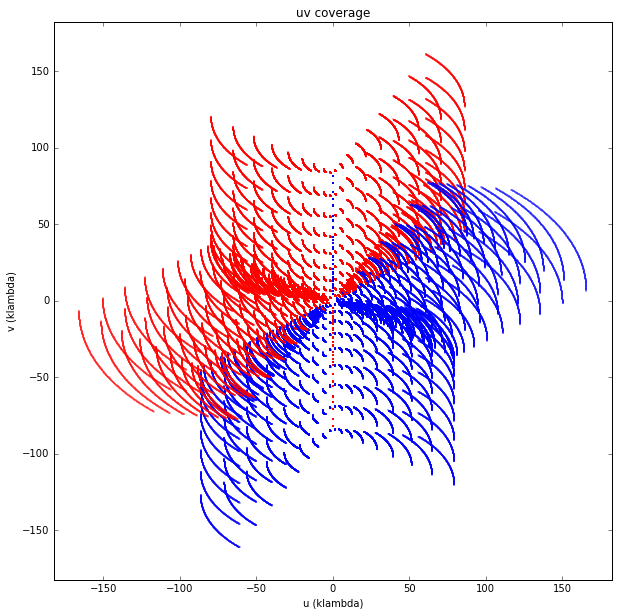

Ntimes=1200


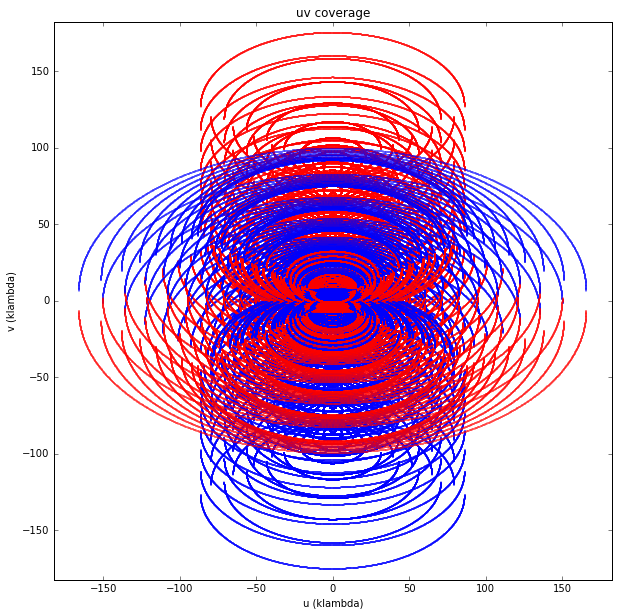

In [15]:
from ipywidgets import *
from IPython.display import display

def Interactplot(key,Ntimes):
    print "Ntimes="+str(Ntimes)
    plotBL.plotuv(antennaPosition,L,dec,h,Ntimes,lam)
    
slider=IntSlider(description="Ntimes",min=2,max=1200,step=100,continuous_update=False)

slider.on_trait_change(Interactplot,'value')
display(slider)
Interactplot("",2)

<a id="fig:4416"></a>
**Figure 4.4.16**: Sampled $uv$ coverage of the interferometer for various values of time samples. Red and blue points corresponds to symmetric $uv$ points due to the fact that each baseline give us the measurement of $V_\nu$ at ($u$,$v$) and its complex conjugate $V^*_\nu$ at ($-u$,$-v$).

With an increasing number of time steps, you can see each individual baselines describing its own elliptic $uv$ track in the $uv$ plane. It is easy to understand that the longer the observation, the better the sampling of the visibility function.

<a id="sec:442C"></a>
### 4.4.2.C Integration in frequency: Frequency Synthesis

We have seen in [$\S$ 4.2 &#10142;](4_2_The_2-element_Interferometer.ipynb) that the $u$, $v$, $w$ coordinates are usually normalized by $\lambda$. As a consequence, observing with the same interferometer but at a different frequency, give a different set of spatial frequencies. Sampling at a different $u$, $v$ coordinates results in a **scaling** of the uv coverage of the original frequency. Indeed, for the same snapshot $uv$ coverage at wavelength $\lambda_1$, the $uv$ coverage at $\lambda_2 < \lambda_1$ will be a shrunk version of that a $\lambda_1$. 

If the distribution of frequencies is (quasi) continuous, e.g. if the observing system operates in a bandwidth [$f_\text{min}$,$f_\text{max}$], with $N_\text{freqs}$ channels, we can sample contiguously portions of the $uv$ plane with $\frac{N(N-1)}{2}\times N_\text{freqs}$ independent measurements. For each baseline, a radial track will be generated due to the frequency scaling effect of $u$ and $v$.

<div class=warn>
**Warning:** It is possible to do this up to a certain point (see the *bandwidth smearing* in [$\S$ 9.3 &#10142;](../9_Practical/9_3_Observing_smearing.ipynb)).
</div>

In the next block, a snapshot observation will be plotted. You can increase the number of contiguous frequency channels  (at 10 MHz steps) with the slider. Upon a change on the slider, a new plot will be generated next to the previous one to enable visual comparisons (Note: allow some time to generate the plot).

(Test values of 1, 20, 200 to see the effects on the $uv$ coverage).

Nfreqs=1


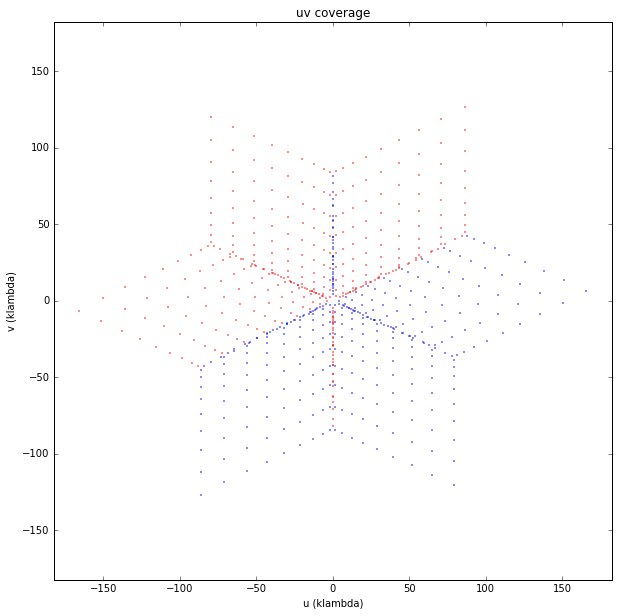

Nfreqs=20


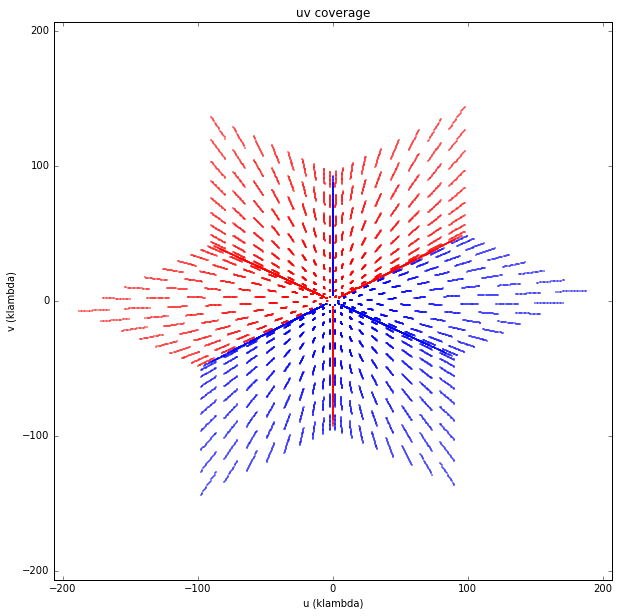

Nfreqs=106


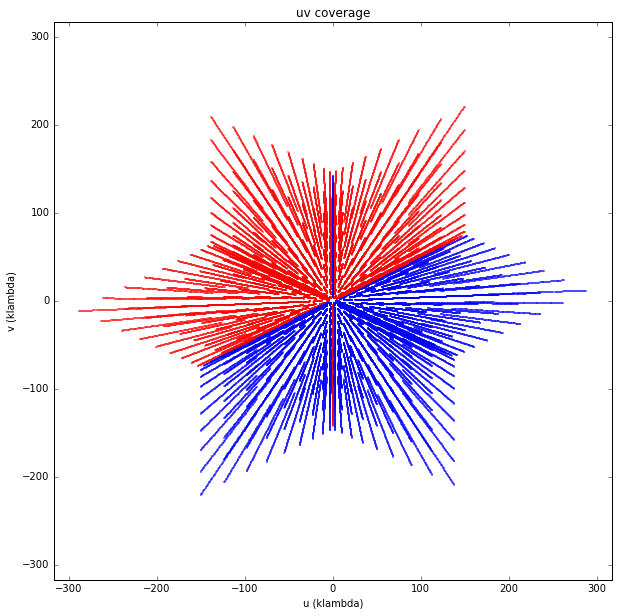

In [16]:
df=10e6 # frequency step
f0=c/lam # starting frequency
lamb0=lam # starting wavelength


def Interactplot(key,Nfreqs):
    print "Nfreqs="+str(Nfreqs)
    plotBL.plotuv_freq(antennaPosition,L,dec,h,Nfreqs,lamb0,df)
    
slider=IntSlider(description="Nfreqs",min=1,max=200,step=1,continuous_update=False)

slider.on_trait_change(Interactplot,'value')
display(slider)
Interactplot("",1)

<a id="fig:4417"></a>
**Figure 4.4.17**: Snapshot $uv$ coverage of the interferometer for various values of frequency channels. Red and blue points corresponds to symmetric $uv$ points due to the fact that each baseline give us the measurement of $V_\nu$ at ($u$,$v$) and its complex conjugate $V^*_\nu$ at ($-u$,$-v$).

With an increasing number of frequency channels, you can see each individual baselines describing radial track in the $uv$ plane. It is easy to understand that the more frequency channels you allocate to the observation, the better the sampling of the visibility function (theoretically).

## Conclusion

The $uv$ plane is an important quantity to monitor when observing with an interferometer. In an ideal case, this plane is the support of the visibility function, characteristic of the sky we want to observe. The $uv$ coverage of an observation is a way to know which portion of the visibility function has been sampled.

We have seen in [$\S$ 4.4.1 &#10142;](4_4_1_UV_Coverage_UV_Tracks.ipynb) that the sampling with one baseline take the form of elliptical trajectories which parameters can be predicted with the location of the interferometer on the Earth, the direction of the source and the baseline characteristics. Due to the motion of the Earth, the sampled spatial frequency (at coordinate $u$, $v$) will follow the $uv$ track.

In [$\S$ 4.4.2 &#10549;](4_4_2_UV_Coverage_Improving_Your_Coverage.ipynb), we addressed three different ways of enriching the $uv$ coverage. First, we can increase the number of antennas and its distribution to improve the instantaneous spatial frequency coverage. Second, we can use the fact that the observed source are moving with the Celestial Sphere (due to Earth rotation). The continuous variation of the projected baseline, and therefore, of the $u$, $v$ coordinates, allow to sample portion of the elliptical $uv$ tracks, for each baseline. A long integration time allow to naturally cover the $uv$ plane without any additional expense than computing the signals correlation at a higher temporal rate (which depend on the desired temporal resolution of each sample). Third, with the use of broadband receivers, we can sample the visibilities at various frequencies by computing the cross-correlation in different frequency channels. With this principle, the $uv$ coverage can also be improved along radial $uv$ tracks.
These methods however are facing limitation which will alter the sensitivity and the point source response of the instrument (see [$\S$ 9.3 &#10142;](../9_Practical/9_3_Observing_smearing.ipynb)).

In [$\S$ 4.5  &#10142;](4_5_The_Fourier_Approximation_VanCittert-Zernike_Theorem.ipynb) we will formulate more clearly all underlying hypotheses we assumed in the previous section. This section will be a prerequisites before addressing the subject of imaging in [$\S$ 5 &#10142;](../5_Imaging/5_0_introduction.ipynb).





<p class=conclusion>
  <font size=4> **Important things to remember**</font>
  <br>
&bull; The number of antennas and their non-redundant distribution are important factors of improvement of the snapshot $uv$ coverage.<br>
&bull; Time integration using Earth Rotation Synthesis builds up the elliptical $uv$ tracks of each baseline (but generates *time smearing*).<br>
&bull; Frequency integration by observing in a larger bandwidth composed of multiple contiguous channels also helps to cover the $uv$ coverage radially (but generate *frequency smearing*).<br>
</p>

---
* [Go back up](#beginning) <!--\ref{beginning}--> 
* Next: [4.5 The Fourier Approximation & the Van Cittert-Zernike theorem](4_5_The_Fourier_Approximation_VanCittert-Zernike_Theorem.ipynb)